In [375]:
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import deepcopy

In [376]:
def sign(x):
    if x == 0:
        return 0
    return x / abs(x)

In [377]:
def func(x):
    return x**3 + math.sin(x) - 12*x + 1

In [378]:
def func_d(x):
    return 2*x**2 + math.cos(x) - 12

In [379]:
def func_poly(x, coofs, xs):
    y = 0
    mn = 1
    for i in range(len(coofs)):
        y += coofs[i] * mn
        mn *= (x - xs[i])
    return y

In [380]:
def plot_func(func, a=-10, b=10, title='Function'):
    #a = -6
    #b = 6
    xs = np.arange(a, b, 0.01)
    ys = np.vectorize(func)(xs)
    plt.plot(xs, ys)
    plt.plot([a, b], [0, 0])
    if b > 0:
        plt.plot([0, 0], [10, -10])
    plt.title(title)

In [381]:
def dichotomy(a, b, eps, func):
    i = 0
    x = -100
    print(f"initial {i}: x: {x} f: {func(x)}")
    while True:
        x_ = x
        i += 1
        x = (a + b)/2
        print(f"{i}: x: {x} f: {func(x)}")
        if sign(func(a)) == sign(func(x)):
            a = x
        if sign(func(b)) == sign(func(x)):
            b = x
        #i += 1
        if abs(x_ - x) <= eps * 2:
            break
    #print(f"{i}: x: {x} f: {func(x)}")
    return x

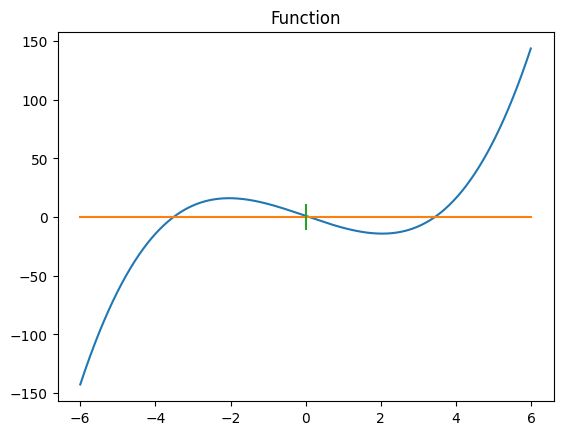

In [382]:
plot_func(func, -6, 6)

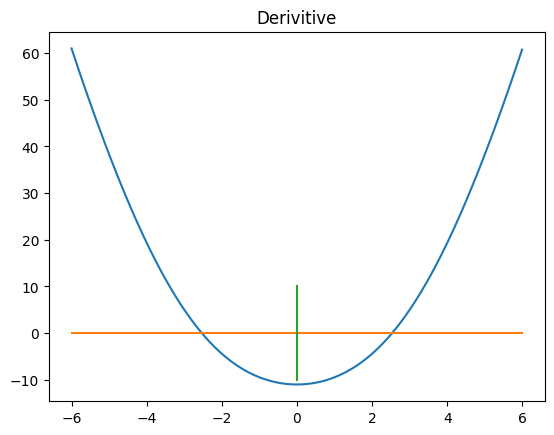

In [383]:
plot_func(func_d, -6, 6, 'Derivitive')

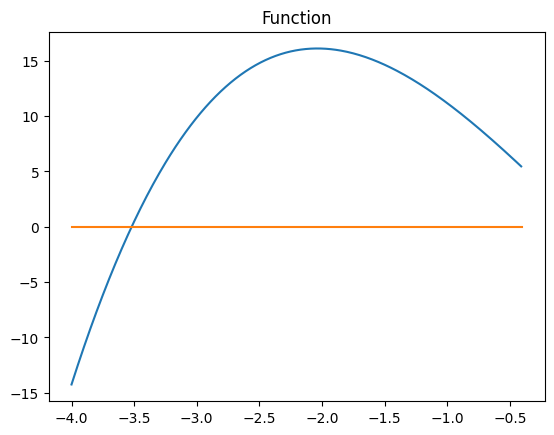

In [384]:
plot_func(func, -4, -0.4)

In [385]:
#LAB PART 1

In [386]:
#1

In [387]:
xs1 = np.arange(-4, -0.3, 0.4).tolist()

In [388]:
xs1

[-4.0,
 -3.6,
 -3.2,
 -2.8000000000000003,
 -2.4000000000000004,
 -2.0000000000000004,
 -1.6000000000000005,
 -1.2000000000000006,
 -0.8000000000000007,
 -0.4000000000000008]

In [389]:
ys1 = np.vectorize(func)(xs1).tolist()

In [390]:
ys1

[-14.24319750469207,
 -2.0134795567051498,
 6.690374143427576,
 12.313011849844091,
 15.300536819448848,
 16.09070257317432,
 15.104426396958496,
 12.739960914032778,
 9.370643909100483,
 5.346581657691358]

In [391]:
def get_polyn(xs1, ys1):
    table = [ys1]
    coofs = [ys1[0]]
    for i in range(1, 10):
        col = []
        for j in range(i, 10):
            col.append((table[i - 1][j - (i - 1)] - table[i - 1][j - i]) / 
                   (xs1[j] - xs1[j - i]))
        coofs.append(col[0])
        table.append(deepcopy(col))
    return table, coofs

In [392]:
table, coofs = get_polyn(xs1, ys1)

In [393]:
table

[[-14.24319750469207,
  -2.0134795567051498,
  6.690374143427576,
  12.313011849844091,
  15.300536819448848,
  16.09070257317432,
  15.104426396958496,
  12.739960914032778,
  9.370643909100483,
  5.346581657691358],
 [30.574294869967307,
  21.759634250331818,
  14.056594266041293,
  7.468812424011892,
  1.9754143843136789,
  -2.4656904405395568,
  -5.911163707314296,
  -8.42329251233074,
  -10.060155628522816],
 [-11.018325774544364,
  -9.628799980363159,
  -8.234727302536752,
  -6.866747549622769,
  -5.551381031066546,
  -4.306841583468425,
  -3.140161006270555,
  -2.046078895240096],
 [1.1579381618176712,
  1.1617272315220053,
  1.1399831274283199,
  1.0961387654635193,
  1.0371162063317676,
  0.9722338143315584,
  0.9117350925253829],
 [0.0023681685652088284,
  -0.0135900650585534,
  -0.027402726228000364,
  -0.036889099457344816,
  -0.04055149500013074,
  -0.037811701128859725],
 [-0.007979116811881116,
  -0.006906330584723484,
  -0.004743186614672227,
  -0.0018311977713929635,
 

In [394]:
coofs

[-14.24319750469207,
 30.574294869967307,
 -11.018325774544364,
 1.1579381618176712,
 0.0023681685652088284,
 -0.007979116811881116,
 0.0004469942613156802,
 0.0001622556165020275,
 -1.58813648468014e-05,
 -1.527185379117854e-06]

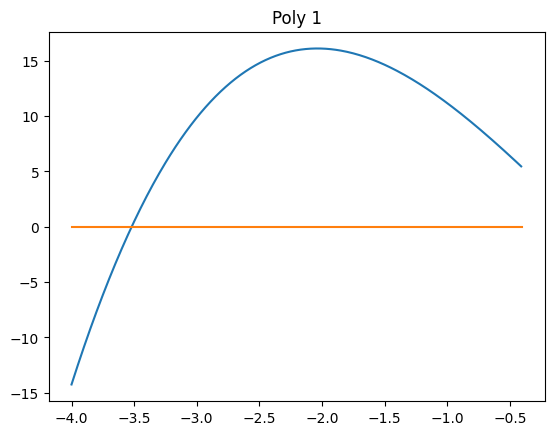

In [395]:
plot_func(lambda x: func_poly(x, coofs, xs1), -4, -0.4, 'Poly 1')

In [396]:
dichotomy(-4, -0.4, 0.0001, lambda x: func_poly(x, coofs, xs1))

initial 0: x: -100 f: 1085204070264.6648
1: x: -2.2 f: 15.943503615560454
2: x: -3.1 f: 8.367419373987305
3: x: -3.55 f: -0.741726912174928
4: x: -3.325 f: 4.322427620486102
5: x: -3.4375 f: 1.9227112663113988
6: x: -3.49375 f: 0.6242010242570237
7: x: -3.5218749999999996 f: -0.05025857896017216
8: x: -3.5078125 f: 0.28908767836526345
9: x: -3.51484375 f: 0.11994486863390896
10: x: -3.5183593749999997 f: 0.03497587514671304
11: x: -3.5201171874999995 f: -0.007608150510195879
12: x: -3.51923828125 f: 0.013692160315139736
13: x: -3.5196777343749996 f: 0.003044079695732847
14: x: -3.5198974609374996 f: -0.0022815166721621713
15: x: -3.51978759765625 f: 0.000381411190952714


-3.51978759765625

In [397]:
#2 Cheb

In [398]:
from copy import deepcopy

In [421]:
xs2 = list(reversed([-2.2 + 1.8 * math.cos((2*i + 1) * math.pi / 20) for i in range(10)]))

In [422]:
ys2 = list(map(func, xs2))

In [423]:
xs2

[-3.977839013071248,
 -3.803811743539062,
 -3.472792206135786,
 -3.0171828995311842,
 -2.4815820370724153,
 -1.9184179629275846,
 -1.382817100468816,
 -0.9272077938642145,
 -0.596188256460938,
 -0.42216098692875215]

In [424]:
ys2

[-13.465954434787015,
 -7.776681093306053,
 1.1158178890853563,
 9.61550509436411,
 14.883658098434449,
 16.02042361611552,
 13.96722179868154,
 10.529412190941716,
 7.380857251670438,
 5.580961682045567]

In [425]:
table2, coofs2 = get_polyn(xs2, ys2)

In [426]:
coofs2

[-13.465954434787015,
 32.69184971283332,
 -11.53928596520836,
 1.149711516973389,
 0.008458478118609093,
 -0.008019112058515418,
 0.0003588949153370315,
 0.00016189024253526955,
 -1.5639677497868205e-05,
 -1.5062793540492617e-06]

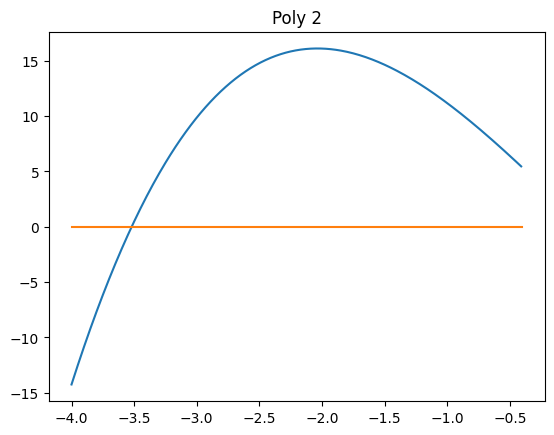

In [428]:
plot_func(lambda x: func_poly(x, coofs2, xs2), -4, -0.4, 'Poly 2')

In [429]:
dichotomy(-4, -0.4, 0.0001, lambda x: func_poly(x, coofs2, xs2))

initial 0: x: -100 f: 1070717479068.0372
1: x: -2.2 f: 15.943503742288204
2: x: -3.1 f: 8.367419405797454
3: x: -3.55 f: -0.7417269095677586
4: x: -3.325 f: 4.322427818354133
5: x: -3.4375 f: 1.9227114327204178
6: x: -3.49375 f: 0.6242011264004417
7: x: -3.5218749999999996 f: -0.050258522220376974
8: x: -3.5078125 f: 0.2890877589136522
9: x: -3.51484375 f: 0.11994493755343108
10: x: -3.5183593749999997 f: 0.034975938045010965
11: x: -3.5201171874999995 f: -0.007608090674019428
12: x: -3.51923828125 f: 0.013692221686662865
13: x: -3.5196777343749996 f: 0.0030441403006536893
14: x: -3.5198974609374996 f: -0.0022814564513448533
15: x: -3.51978759765625 f: 0.00038147160388939534


-3.51978759765625

In [430]:
#PART 2

In [431]:
f = ys2

In [432]:
xs_ = xs2

In [433]:
xs_

[-3.977839013071248,
 -3.803811743539062,
 -3.472792206135786,
 -3.0171828995311842,
 -2.4815820370724153,
 -1.9184179629275846,
 -1.382817100468816,
 -0.9272077938642145,
 -0.596188256460938,
 -0.42216098692875215]

In [434]:
hs = [xs_[i+1] - xs_[i] for i in range(len(xs_) - 1)]

In [435]:
hs

[0.17402726953218606,
 0.33101953740327605,
 0.45560930660460164,
 0.5356008624587689,
 0.5631640741448307,
 0.5356008624587687,
 0.4556093066046014,
 0.3310195374032765,
 0.17402726953218584]

In [436]:
len(hs)

9

In [437]:
A = np.zeros((8, 8))
A[0][0] = (hs[0] + hs[1]) / 3
A[0][1] = hs[1] / 6
A[7][6] = (hs[7]) / 6
A[7][7] = (hs[7] + hs[8]) / 3
for i in range(1, 7):
    A[i][i - 1] = hs[i] / 6
    A[i][i] = (hs[i] + hs[i+1]) / 3
    A[i][i + 1] = hs[i + 1] / 6

In [438]:
A

array([[0.16834894, 0.05516992, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.05516992, 0.26220961, 0.07593488, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.07593488, 0.33040339, 0.08926681, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.08926681, 0.36625498, 0.09386068,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.09386068, 0.36625498,
        0.08926681, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.08926681,
        0.33040339, 0.07593488, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07593488, 0.26220961, 0.05516992],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05516992, 0.16834894]])

In [439]:
H = np.zeros((8, 10))
for i in range(10 - 2):
    H[i][i] = 1 / hs[i]
    H[i][i+1] = -(1 / hs[i] + 1 / hs[i + 1])
    H[i][i+2] = 1 / hs[i + 1]

In [440]:
H

array([[ 5.74622588, -8.7671956 ,  3.02096972,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.02096972, -5.2158327 ,  2.19486298,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.19486298, -4.06192495,  1.86706197,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.86706197, -3.64274342,
         1.77568145,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.77568145,
        -3.64274342,  1.86706197,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.86706197, -4.06192495,  2.19486298,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.19486298, -5.2158327 

In [441]:
Hf = np.dot(H, f)

In [442]:
Hf

array([-5.82787953, -8.2083214 , -8.81968067, -7.81743467, -5.85198847,
       -3.71206601, -1.9661681 , -0.83091736])

In [443]:
def yacob(x0, A, b, eps):
    x_old = deepcopy(x0)
    x_new = deepcopy(x0)
    k = 1
    while True:
        for i in range(A.shape[0]):
            x_new[i] = float(np.sum([- A[i][j] / A[i][i] * x_old[j] for j in range(A.shape[1])] + [1 * x_old[i], b[i] / A[i][i]]))
        print(f'it: {k} {x_new}')
        print(f"A * x =", np.dot(A, x_new))
        if k == 1:
            print(f'norm of vector(|| x[{k}] - x[{k-1}]||) = {np.linalg.norm(x_new - x_old)}')
        if np.linalg.norm(x_new - x_old) < eps:
            print(f'norm of vector(|| x[{k}] - x[{k-1}]||) = {np.linalg.norm(x_new - x_old)}')
            return x_new
        
        x_old = deepcopy(x_new)
        k += 1

In [444]:
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0], dtype=np.float32)

In [445]:
vec = yacob(x0, A, Hf, 0.0001)

it: 1 [-34.61786   -31.304426  -26.693674  -21.344242  -15.977908  -11.234951
  -7.4984593  -4.935685 ]
A * x = [ -7.55494248 -12.14516719 -13.1021108  -11.69999139  -8.85828171
  -5.70775744  -3.09159421  -1.24460677]
norm of vector(|| x[1] - x[0]||) = 61.713836669921875
it: 2 [-24.35903   -16.29031   -13.732457  -10.743548   -7.7697105  -5.1947846
  -3.2063737  -2.478352 ]
A * x = [-4.99955188 -6.65813423 -6.73329549 -5.89000105 -4.31781377 -2.65342735
 -1.37193787 -0.59412332]
it: 3 [-29.279331 -22.202326 -20.047117 -16.006094 -11.958527  -8.398864
  -5.472615  -3.884919]
A * x = [-6.15404485 -8.95927727 -9.73837949 -8.77428925 -6.63195254 -4.25807496
 -2.28706964 -0.9559457 ]
it: 4 [-27.341894 -19.338373 -17.26658  -13.393558  -9.82896   -6.746311
  -4.248779  -3.142245]
A * x = [-5.66987534 -7.89029337 -8.36899405 -7.36934261 -5.45925578 -3.42903456
 -1.79970843 -0.76339841]
it: 5 [-28.280445  -20.55125   -18.63063   -14.617001  -10.901254   -7.6029353
  -4.883613   -3.5433106]
A 

In [446]:
vec

array([-28.021511 , -20.128487 , -18.232616 , -14.194575 , -10.558515 ,
        -7.310258 ,  -4.664573 ,  -3.4070444], dtype=float32)

In [447]:
ms = [0] + vec.tolist() + [0]

In [448]:
ms

[0,
 -28.02151107788086,
 -20.12848663330078,
 -18.232616424560547,
 -14.194575309753418,
 -10.558514595031738,
 -7.310257911682129,
 -4.6645731925964355,
 -3.4070444107055664,
 0]

In [449]:
spline_koofs = []
for i in range(9):
    spline_koofs.append([ms[i] / (6 * hs[i]), ms[i + 1] / (6 * hs[i]), 
                         (f[i] - ms[i] * hs[i]**2 / 6) / hs[i], (f[i + 1] - ms[i + 1] * hs[i]**2 / 6)/hs[i]])

In [450]:
spline_koofs

[[0.0, -26.836322025093438, -77.37841587117764, -43.87381498150274],
 [-14.10868942343962,
  -10.13459144597184,
  -21.9471735174882,
  4.481339114241832],
 [-7.363211689457868,
  -6.669682467067351,
  3.977521682504325,
  22.489207778100447],
 [-5.673570782062271,
  -4.417025284024236,
  19.580311372612787,
  29.05581643430063],
 [-4.200840679011707,
  -3.124759751725087,
  27.760948076765196,
  29.43819839232789],
 [-3.285566838759073,
  -2.274784086456695,
  30.853648555747952,
  26.73023201751855],
 [-2.674169076337703,
  -1.7063498356222726,
  31.211241636515947,
  23.464820835899626],
 [-2.3485890637494564,
  -1.7154296679044716,
  32.066379566326454,
  22.485312659705475],
 [-3.2629411278131553, 0.0, 42.5108927283048, 32.069466452287145]]

In [451]:
len(spline_koofs)

9

In [452]:
i = 0
for (a, b, c, d) in spline_koofs:
    #print(f'{round(c, 2)}*({round(xs_[i + 1], 2)} - x) + {round(d, 2)}*(x - {round(xs_[i], 2)})')
    print(f's(x) = {round(a, 2)}*({round(xs_[i + 1], 2)} - x)^3 + {round(b, 2)}*(x - {round(xs_[i], 2)})^3 +' + 
          f'{round(c, 2)}*({round(xs_[i + 1], 2)} - x) + {round(d, 2)}*(x - {round(xs_[i], 2)})')
    i += 1

s(x) = 0.0*(-3.8 - x)^3 + -26.84*(x - -3.98)^3 +-77.38*(-3.8 - x) + -43.87*(x - -3.98)
s(x) = -14.11*(-3.47 - x)^3 + -10.13*(x - -3.8)^3 +-21.95*(-3.47 - x) + 4.48*(x - -3.8)
s(x) = -7.36*(-3.02 - x)^3 + -6.67*(x - -3.47)^3 +3.98*(-3.02 - x) + 22.49*(x - -3.47)
s(x) = -5.67*(-2.48 - x)^3 + -4.42*(x - -3.02)^3 +19.58*(-2.48 - x) + 29.06*(x - -3.02)
s(x) = -4.2*(-1.92 - x)^3 + -3.12*(x - -2.48)^3 +27.76*(-1.92 - x) + 29.44*(x - -2.48)
s(x) = -3.29*(-1.38 - x)^3 + -2.27*(x - -1.92)^3 +30.85*(-1.38 - x) + 26.73*(x - -1.92)
s(x) = -2.67*(-0.93 - x)^3 + -1.71*(x - -1.38)^3 +31.21*(-0.93 - x) + 23.46*(x - -1.38)
s(x) = -2.35*(-0.6 - x)^3 + -1.72*(x - -0.93)^3 +32.07*(-0.6 - x) + 22.49*(x - -0.93)
s(x) = -3.26*(-0.42 - x)^3 + 0.0*(x - -0.6)^3 +42.51*(-0.42 - x) + 32.07*(x - -0.6)


In [453]:
#plot spilne

In [454]:
def spline(x, xc, cot):
    #print(cot)
    a, b, c, d = cot
    return a * (xc[1] - x)**3 + b * (x - xc[0])**3 + c*(xc[1] - x) + d * (x - xc[0])

In [455]:
def spline_func(x, cofs):
    xs, ys = [], []
    for i in range(9):
        #print(np.arange(x[i], x[i + 1], 0.001))
        xt = np.arange(x[i], x[i + 1], 0.01).tolist()
        #print(xt)
        #print(xt)
        yt = list(map(lambda t: spline(t, [x[i], x[i+1]], cofs[i]), xt))
        xs += xt
        ys += yt
    return xs, ys

In [456]:
xs_

[-3.977839013071248,
 -3.803811743539062,
 -3.472792206135786,
 -3.0171828995311842,
 -2.4815820370724153,
 -1.9184179629275846,
 -1.382817100468816,
 -0.9272077938642145,
 -0.596188256460938,
 -0.42216098692875215]

In [457]:
xs_[0]

-3.977839013071248

In [458]:
xs_[0 + 1]

-3.803811743539062

In [459]:
print(np.arange(xs_[0], xs_[0 + 1], 0.00001))

[-3.97783901 -3.97782901 -3.97781901 ... -3.80383901 -3.80382901
 -3.80381901]


In [460]:
x__, y__ = spline_func(xs_, spline_koofs)

Text(0.5, 1.0, 'Quadratic natural spline')

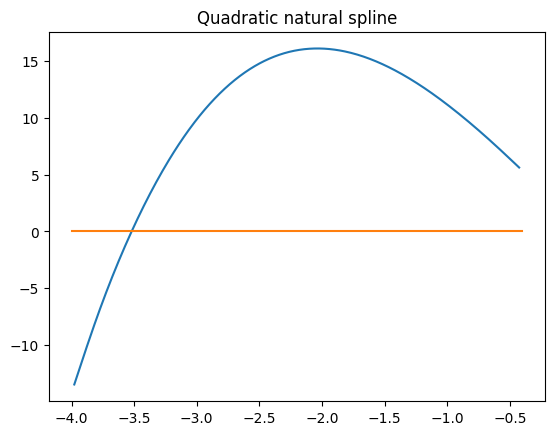

In [463]:
plt.plot(x__, y__)
plt.plot([-4, -0.4], [0, 0])
plt.title('Quadratic natural spline')